In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [2]:
### Run this if you're on a mac 

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Inference

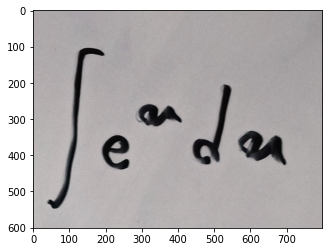

In [3]:
image = cv2.imread('custom-test-7.jpg')

%matplotlib inline
plt.imshow(image)

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='problem-solver-32-416/exp17/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/prp-e/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-12-23 torch 1.10.0 CPU

Fusing layers... 
Model Summary: 213 layers, 7109914 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [5]:
result = model(image)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [6]:
result.print()

image 1/1: 601x799 1 integrate, 1 dx, 1 e^x
Speed: 11.1ms pre-process, 236.3ms inference, 15.6ms NMS per image at shape (1, 3, 512, 640)


In [7]:
df = result.pandas().xyxy[0]

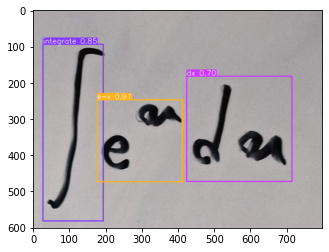

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))

# Attempts on DSL

In [9]:
df = df['name'].tolist()
problem_set = []
for op in df:
    if op == 'integrate' and not problem_set:
        problem_set.append(op)
        df.remove(op)
    for q in df:
        if q == 'e^x' and problem_set and problem_set[0] == 'integrate':
            problem_set.append(q)

In [13]:
wolfram_url = "https://www.wolframalpha.com/input/?i=" 

In [15]:
import urllib

In [23]:
problem = urllib.parse.quote(' '.join(problem_set))
wolfram_url + problem

'https://www.wolframalpha.com/input/?i=integrate%20e%5Ex'

# Inference on different problem set and using the dsl

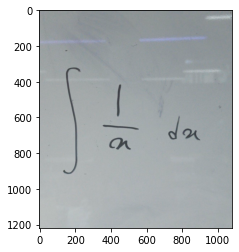

In [29]:
image = cv2.imread('custom-test-10.jpg')

%matplotlib inline
plt.imshow(image)

In [32]:
result = model(image)

df = result.pandas().xyxy[0]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [36]:
def problem_url_generator(dataframe):
    dataframe = dataframe['name'].tolist()
    
    operators = ['integrate', 'derivative']
    differentials = ['dx', 'dxdy']
    operands = ['x', '1/x', 'lnx', 'x^2', 'x^3', 'e^x', 'x^e', 'sqrt(x)', 'x/2', 'x/3', 'sinx', 'cosx', 'tanx', 'cotanx', 'dxdy', 'x+y', 'y^2', '(x+y)/y^2' ]
    
    problem_set = []
    
    for operator in dataframe:
        if not problem_set and operator in operators:
            problem_set.append(operator)
            dataframe.remove(operator)
        for operand in dataframe:
            if problem_set and problem_set[0] in operators and operand in operands:
                problem_set.append(operand)
                dataframe.remove(operand)
        for differential in dataframe:
            if problem_set and len(problem_set) == 2 and problem_set[1] in operands and differential in differentials:
                problem_set.append(differential)
                dataframe.remove(differential)
                
        problem = ' '.join(problem_set)
        url = "https://www.wolframalpha.com/input/?i=" + urllib.parse.quote(problem)
        
    return problem_set, problem, url

In [37]:
problem_url_generator(df)

(['integrate', '1/x', 'dx'],
 'integrate 1/x dx',
 'https://www.wolframalpha.com/input/?i=integrate%201/x%20dx')